In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline 

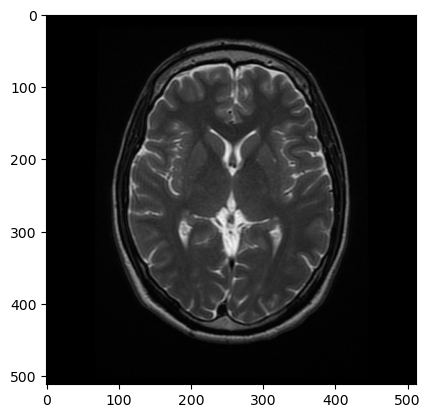

In [2]:
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color from BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Gaussian Blur the Image

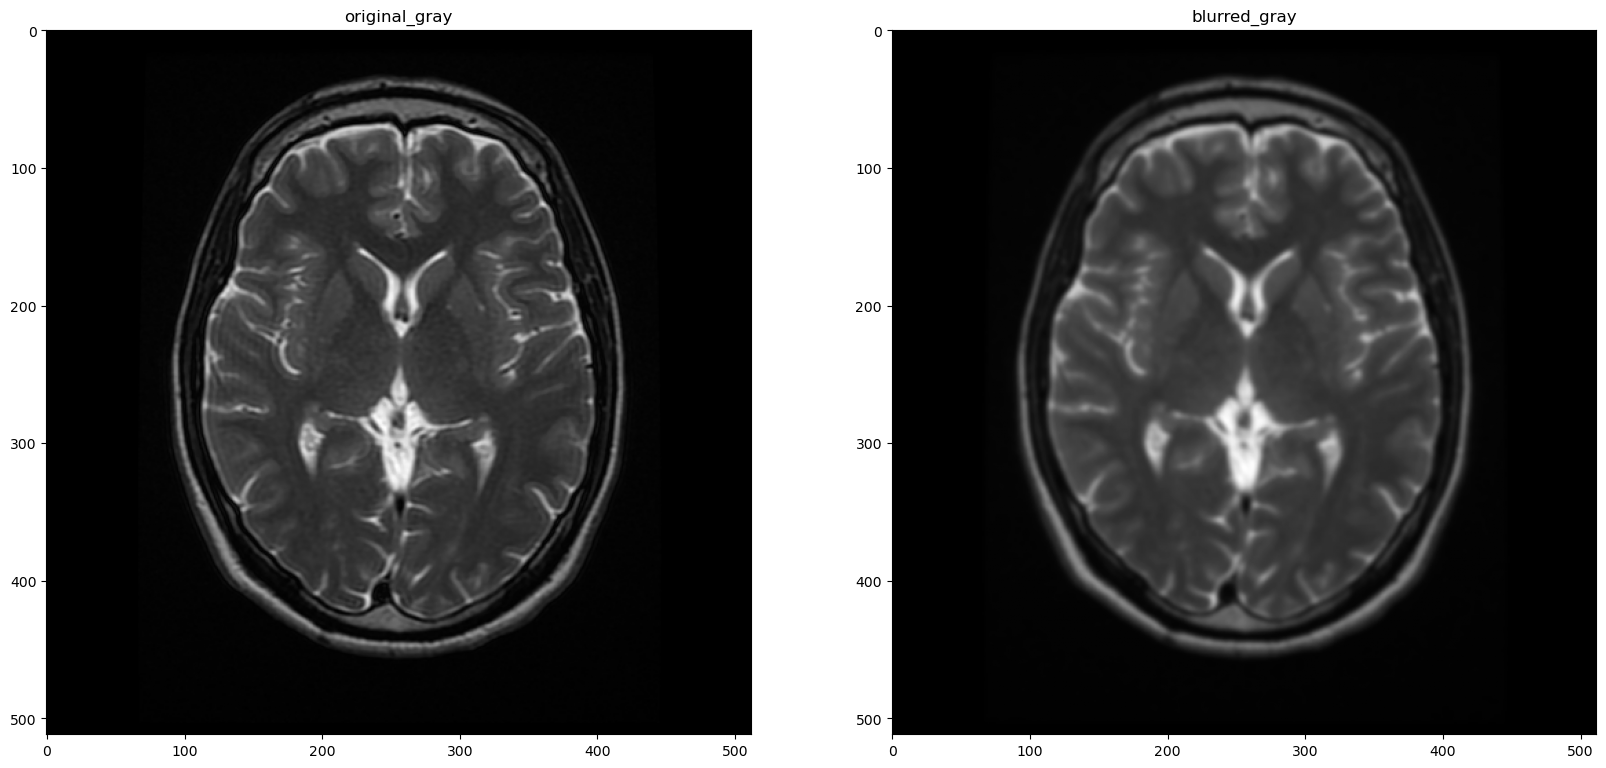

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian Blurred Image
gray_blur = cv2.GaussianBlur(gray, (9,9), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))

ax1.set_title('original_gray')
ax1.imshow(gray, cmap = 'gray')

ax2.set_title('blurred_gray')
ax2.imshow(gray_blur, cmap = 'gray')

### Test Performance with a High-Pass Filter

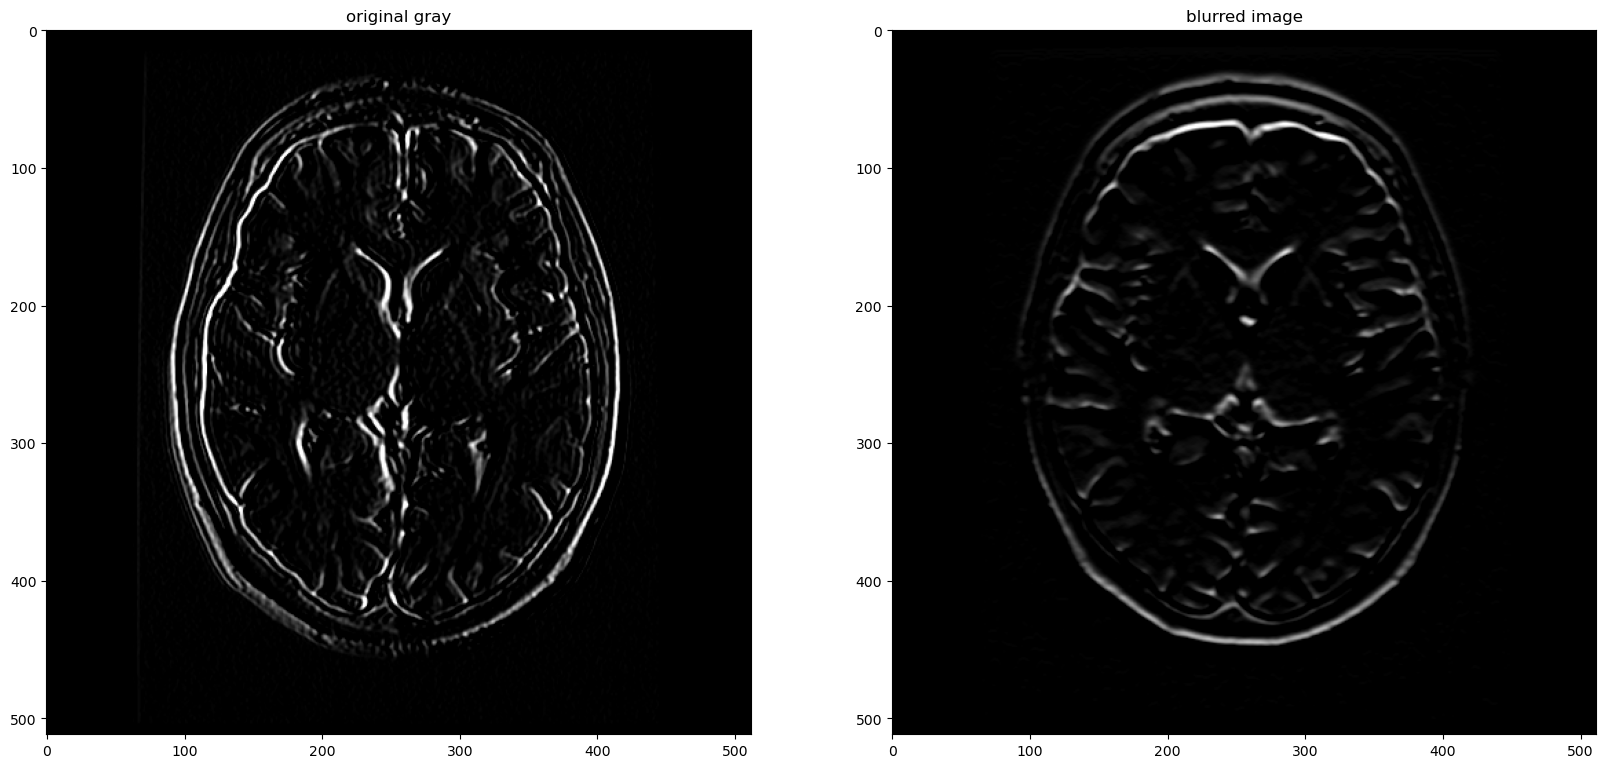

In [4]:
# High-Pass Filter

# 3 x 3 sobel filters for edge detection 
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

# Filter the original and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobel_y)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(filtered_blurred, cmap='gray')

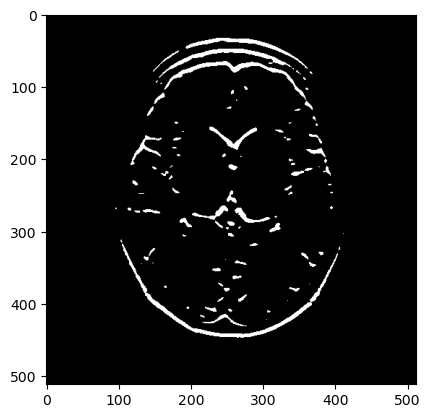

In [6]:
# Create a threshold that sets all the filtered pixels to white 
# above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')